In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#將MNIST 手寫數字資料讀進來
mnist = tf.keras.datasets.mnist

# mnist 的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的值從 Int 轉成 floating point 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
from sklearn.linear_model import LogisticRegression

In [7]:
import time

In [294]:
X_train = np.reshape(x_train,(60000,28*28))

In [17]:
X_test = np.reshape(x_test,(10000,28*28))

In [5]:
from scipy.spatial import distance_matrix

In [191]:
start = time.time()
p=distance_matrix(X_train[0].reshape(1,784),X_train[0:60000])    
end = time.time()
print(end-start)


1.208768606185913


In [ ]:
#np.exp(-0.01*distance_matrix(X_train[0].reshape(1,784),X_train[0:60000])**2).T

In [237]:
theta=np.ones([60000,10])

In [8]:
start = time.time()
theta=np.ones([60000,10])
for i in range(150):
        i0=np.random.randint(low=1,high=len(X_train),size=1)[0]
        updatey=np.zeros([60000,10])
        Phi=np.exp(-0.01*distance_matrix(X_train[i0].reshape(1,784),X_train[0:60000])**2).T
        q=np.exp(np.dot(theta.T,Phi))
        tol=sum(q)

        updatecom=(q.T/tol)*Phi.reshape(60000,1)
        updatey[:,y_train[i:i+1]]=Phi
        update=(-1*updatecom+updatey)
        theta=theta+0.003*update
end = time.time()
print(end-start)

<ipython-input-8-3e5e77f741ae>:7: RuntimeWarning: overflow encountered in exp
  q=np.exp(np.dot(theta.T,Phi))
<ipython-input-8-3e5e77f741ae>:10: RuntimeWarning: invalid value encountered in true_divide
  updatecom=(q.T/tol)*Phi.reshape(60000,1)


196.73750591278076


In [9]:
from sklearn import  metrics

In [10]:
def Logistic_digit_pred(X_test,theta,i):
    Phi=np.exp(-0.01*distance_matrix(X_test[i].reshape(1,784),X_train[0:60000])**2).T
    qp=np.exp(np.dot(theta.T,Phi))
    tol=sum(qp)

    return np.argmax(qp/tol)


In [263]:
A=[]
for i in range(len(y_test)):
    A.append(Logistic_digit_pred(X_test,theta,i))


In [264]:
cm1 = metrics.confusion_matrix(y_test, A)
print("Confusion matrix:\n%s" % cm1)

Confusion matrix:
[[ 8  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0]]


In [265]:
print("Accuracy={}".format(metrics.accuracy_score(y_test,A)))

Accuracy=0.08


In [240]:
Logistic_digit_pred(X_test,theta,10)

0

In [153]:
((q.T/tol)*Phi.reshape(60000,1)).shape

(60000, 10)

In [15]:
X_test = np.reshape(x_test,(10000,28*28))

In [6]:
clf = LogisticRegression(max_iter=200).fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn import  metrics

In [8]:
expected = y_test
predicted = clf.predict(X_test)

In [9]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 957    0    1    4    1    9    4    3    1    0]
 [   0 1112    5    1    0    1    3    1   12    0]
 [   6    9  930   15   10    3   12    9   34    4]
 [   4    1   17  922    1   25    2   10   21    7]
 [   1    3    7    3  924    0    5    4    7   28]
 [   9    2    3   34    8  779   15    7   31    4]
 [   8    3    9    2    6   16  911    2    1    0]
 [   1    7   23    7    5    1    0  949    2   33]
 [   9   11    6   22    7   27   14    9  859   10]
 [   9    8    1    9   26    7    0   21    7  921]]


In [10]:
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

Accuracy=0.9264


In [12]:
from scipy.spatial import distance_matrix

In [14]:
p=np.ones(784)*X_train
sum(p).shape

(784,)

In [15]:
theta=np.ones([784,10])

In [32]:
start = time.time()
theta=np.ones([784,10])
for j in range(20):
    for i in range(len(X_train)):
        updatey=np.zeros([784,10])
        Phi=X_train[i]
        q=np.exp(np.dot(theta.T,Phi))
        tol=sum(q)

        updatecom=(q/tol)*Phi.reshape(784,1)
        updatey[:,y_train[i]]=Phi
        update=(-1*updatecom+updatey)
        theta=theta+0.003*update
end = time.time()
print(end-start)

109.00669956207275


In [289]:
def Logistic_digit_pred(X_test,theta,i):
    qp=np.exp(np.dot(theta.T,X_test[i]))
    tol=sum(qp)

    return np.argmax(qp/tol)


In [34]:
A=[]
for i in range(len(y_test)):
    A.append(Logistic_digit_pred(X_test,theta,i))


In [35]:
cm1 = metrics.confusion_matrix(y_test, A)
print("Confusion matrix:\n%s" % cm1)

Confusion matrix:
[[ 966    0    0    3    0    4    4    1    2    0]
 [   0 1116    2    3    0    1    4    2    7    0]
 [   9   13  899   23    7    4   13    9   47    8]
 [   3    1   17  909    0   39    2    9   19   11]
 [   1    1    3    2  898    0   12    3   10   52]
 [   8    2    1   26    7  797   12    5   27    7]
 [  11    3    4    2    8   23  903    3    1    0]
 [   1    9   20    7    6    1    0  933    2   49]
 [   6   12    3   27    8   43   10    7  846   12]
 [  10    8    1    8   19   10    0   11    5  937]]


In [36]:
print("Accuracy={}".format(metrics.accuracy_score(y_test,A)))

Accuracy=0.9204


0.8212

In [292]:
from sklearn.model_selection import KFold

In [293]:
scores = []

cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X_train):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_Train, X_Test, y_Train, y_Test = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    theta=np.ones([784,10])
    for j in range(20):
        for i in range(len(X_Train)):
            updatey=np.zeros([784,10])
            Phi=X_train[i]
            q=np.exp(np.dot(theta.T,Phi))
            tol=sum(q)

            updatecom=(q/tol)*Phi.reshape(784,1)
            updatey[:,y_Train[i]]=Phi
            update=(-1*updatecom+updatey)
            theta=theta+0.003*update
    A=[]
    for i in range(len(y_test)):
        A.append(Logistic_digit_pred(X_test,theta,i))

    scores.append(metrics.accuracy_score(y_Test,A))

Train Index:  [ 6000  6001  6002 ... 59997 59998 59999] 

Test Index:  [   0    1    2 ... 5997 5998 5999]


KeyboardInterrupt: 

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=0)
print(cross_val_score(clf, X_train, y_train, cv=10))

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

[0.92666667 0.92066667 0.90833333 0.926      0.923      0.9155
 0.91283333 0.9175     0.91716667 0.93916667]


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [297]:
sum([0.92666667 ,0.92066667 ,0.90833333 ,0.926    ,  0.923   ,   0.9155
 ,0.91283333 ,0.9175  ,   0.91716667 ,0.93916667])/10

0.9206833340000001

In [37]:
S=np.array([X_train[y_train==i].mean(axis=0) for i in range(10)])

In [281]:
theta=np.ones(10)

for i in range(200):
    updatey=0
    i0=np.random.randint(low=1,high=len(X_train),size=1)[0]
    Phi=np.exp(-0.001*(distance_matrix(X_train[i0].reshape(1,784),S))**2)
    q=np.exp(theta*Phi)
    tol=sum(q.T)

    
    updatecom=(q/tol)*Phi
    updatey=Phi[0][y_train[i0]]
    update=(-1*updatecom+updatey)
    
    theta=theta+0.001*update
    
update    

array([[0.85064703, 0.86298604, 0.85869466, 0.85761169, 0.86056845,
        0.8559248 , 0.86049886, 0.86089504, 0.85891142, 0.86166121]])

In [296]:
def Logistic_digit_pred(S,X_test,theta,i0):
    Phi=np.exp(-0.001*(distance_matrix(X_test[i0].reshape(1,784),S))**2)
    #Phi=distance_matrix(X_test[i0].reshape(1,784),S)
    q=np.exp(theta*Phi)
    tol=sum(q.T)

    return np.argmax(q/tol)

In [286]:
A=[]
for i in range(len(y_test)):
    A.append(Logistic_digit_pred(S,X_test,theta,i))


In [287]:
#print("Accuracy={}".format(metrics.accuracy_score(y_train,A)))

In [288]:
print("Accuracy={}".format(metrics.accuracy_score(y_test,A)))

Accuracy=0.8212


1

<Figure size 432x288 with 0 Axes>

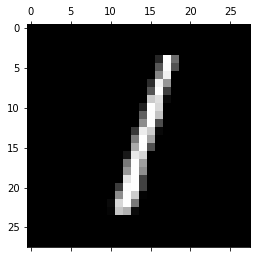

In [113]:
plt.gray()
plt.matshow(X_test[2].reshape(28,28))
y_test[2]

In [39]:
X_train = np.reshape(x_train,(60000,28,28,1))

In [85]:
X_test = np.reshape(x_test,(10000,28,28,1))

In [299]:
scores = []

cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X_train):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_Train, X_Test, y_Train, y_Test = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    theta=np.ones(10)

    for i in range(200):
        updatey=0
        i0=np.random.randint(low=1,high=len(X_Train),size=1)[0]
        Phi=np.exp(-0.001*(distance_matrix(X_Train[i0].reshape(1,784),S))**2)
        q=np.exp(theta*Phi)
        tol=sum(q.T)
        updatecom=(q/tol)*Phi
        updatey=Phi[0][y_Train[i0]]
        update=(-1*updatecom+updatey)
        theta=theta+0.001*update
    
    A=[]
    for i in range(len(y_Test)):
        A.append(Logistic_digit_pred(S,X_Test,theta,i))

    scores.append(metrics.accuracy_score(y_Test,A))

Train Index:  [ 6000  6001  6002 ... 59997 59998 59999] 

Test Index:  [   0    1    2 ... 5997 5998 5999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [ 6000  6001  6002 ... 11997 11998 11999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [12000 12001 12002 ... 17997 17998 17999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [18000 18001 18002 ... 23997 23998 23999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [24000 24001 24002 ... 29997 29998 29999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [30000 30001 30002 ... 35997 35998 35999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [36000 36001 36002 ... 41997 41998 41999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [42000 42001 42002 ... 47997 47998 47999]
Train Index:  [    0     1     2 ... 59997 59998 59999] 

Test Index:  [48000 48001 48002 ... 53997 53

In [302]:
np.array(scores).mean()

0.8075666666666667

In [304]:
scores

[0.8121666666666667,
 0.8048333333333333,
 0.7848333333333334,
 0.8118333333333333,
 0.8075,
 0.7931666666666667,
 0.8071666666666667,
 0.8046666666666666,
 0.8006666666666666,
 0.8488333333333333]

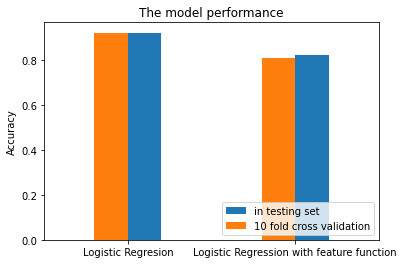

In [343]:
xlabel=['Logistic Regresion','Logistic Regression with feature function']
plt.bar(xlabel,[0.9204,0.82120],label='in testing set', align = "edge",width=0.2)
plt.bar(xlabel,[0.9206833340000001,0.8075666666666667],label='10 fold cross validation', align = "edge",width=-0.2)
plt.legend(loc='lower right')
plt.title("The model performance")
plt.xlim([-0.5,1.5])
#plt.xlabel("feature")
plt.ylabel("Accuracy")
plt.savefig('LOgresult.png')